## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### Gaussian Mixture Models - Demo 2

* Diferenças dos tipos de matriz de covariância.
* Base de dados sintéticas.

In [9]:
import time
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse

from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### GMM

In [18]:
def train_and_plot(data, k=3, covariance_type='full', tol=0.001, 
                   max_iter=100, n_init=1, init_params='kmeans', random_state=133):
    
    # Copiamos os dados e removemos a coluna label 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = GaussianMixture(n_components=k, covariance_type=covariance_type, tol=tol,
                            max_iter=max_iter, n_init=n_init, init_params=init_params, random_state=random_state)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.predict(data_copy)
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

    means = model.means_
    means_x = means[:,0]
    means_y = means[:,1]

    _ = plt.scatter(means_x, means_y, color='black', s=100)
    
    w_factor = 0.2 / model.weights_.max()
    
    if covariance_type == 'tied':
        covars = np.repeat(model.covariances_, k, axis=0)
    else:
        covars = model.covariances_
        
    for pos, covar, w in zip(model.means_, covars, model.weights_):
        draw_ellipse(pos, covar, covariance_type, alpha=w * w_factor)
    
    return model

def draw_ellipse(position, covariance, covariance_type, ax=None, **kwargs):
    """
    Draw an ellipse with a given position and covariance
    
    Method adapted from: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
    """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    elif covariance_type == 'spherical':
        angle = 0
        width = 2 * np.sqrt(covariance)
        height = width
    else:
        angle = 0
        width, height = 2 * np.sqrt(np.abs(covariance))
    
    # Draw the Ellipse
    ax.axis('equal')
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


### Diferentes tipos de matriz de covariância

In [11]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,3.775776,-2.551136,4
1,4.798597,-1.459384,5
2,3.910070,1.590275,0
3,5.554648,1.009466,0
4,-10.997360,2.443557,6


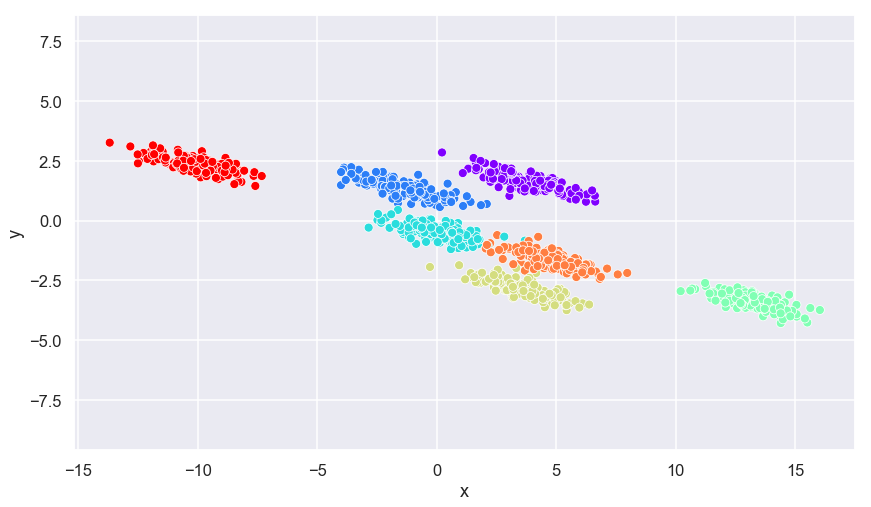

In [22]:
ax = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)
_ = ax.axis('equal')

#### Full

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
        means_init=None, n_components=7, n_init=1, precisions_init=None,
        random_state=4000, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

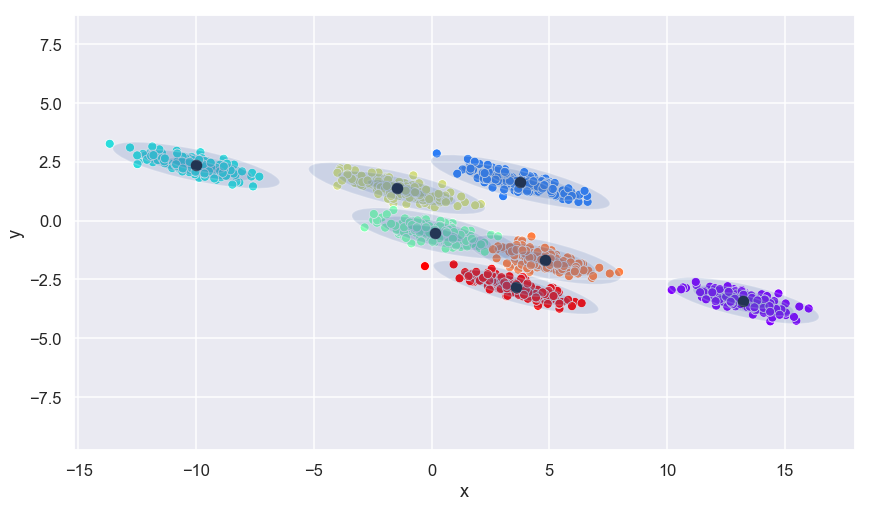

In [23]:
train_and_plot(df_transformed, k=7, random_state=4000, init_params='kmeans', max_iter=1000)

#### Diagonal

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=1000,
        means_init=None, n_components=7, n_init=1, precisions_init=None,
        random_state=4000, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

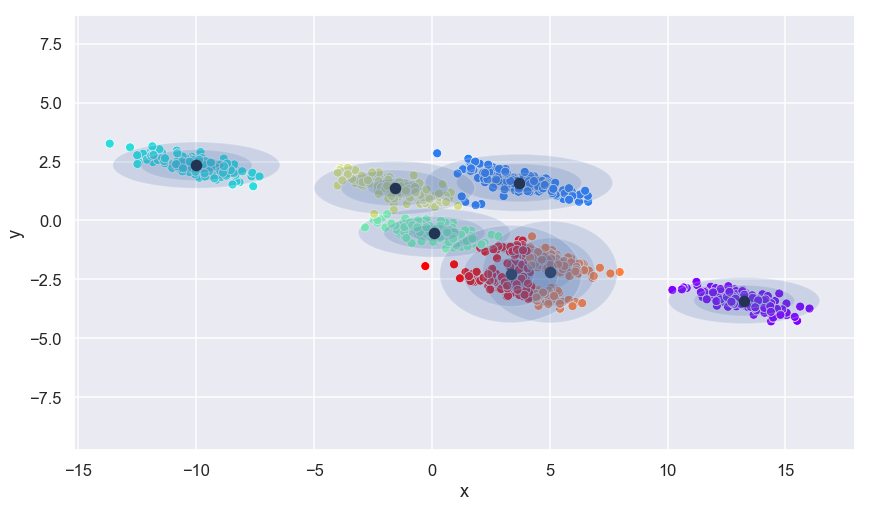

In [24]:
train_and_plot(df_transformed, k=7, random_state=4000, init_params='kmeans', max_iter=1000, covariance_type='diag')

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=1000, means_init=None, n_components=7, n_init=1,
        precisions_init=None, random_state=4000, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

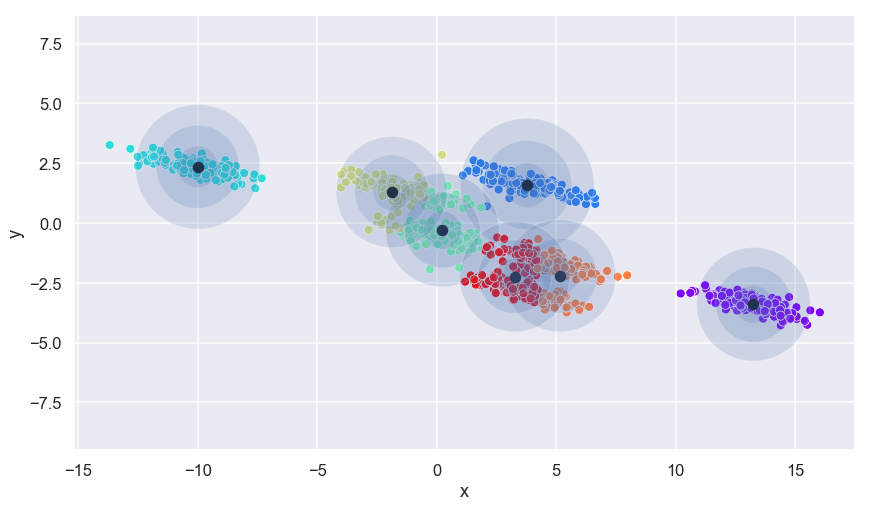

In [25]:
train_and_plot(df_transformed, k=7, random_state=4000, init_params='kmeans', max_iter=1000, covariance_type='spherical')

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=5000,
        means_init=None, n_components=7, n_init=1, precisions_init=None,
        random_state=4000, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

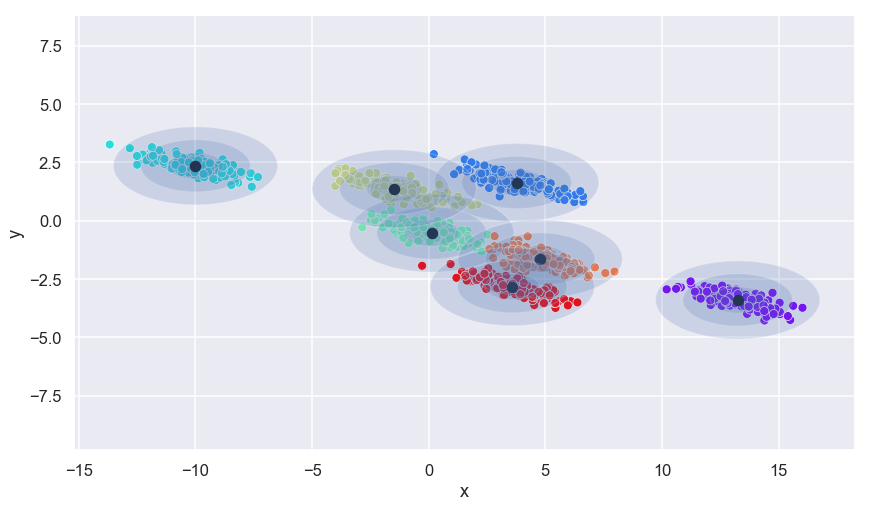

In [26]:
train_and_plot(df_transformed, k=7, random_state=4000, init_params='kmeans', max_iter=5000, covariance_type='tied')